# Introduction to Data Science, CS 5963 / Math 3900
## Lecture 3: Hypothesis Testing I

In this lecture, we'll have a brief glimpse at hypothesis testing. To get started, we'll introduce a few concepts from probability.  

Required reading: 
Grus, Ch.7 [link](proquest.safaribooksonline.com/9781491901410) 

Further reading: 
Jay L. Devore, *Probability and Statistics for Engineering and the Sciences*, 9th ed. Cengage Learning (2016) Ch. 8 and 9. 

For a more complete treatment, take Math 3070 (Applied Statistics I). 

In [1]:
import scipy as sc
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

## Bernoulli Distribution

The Bernoulli distribution, named after Jacob Bernoulli, is the probability distribution of a random variable which takes the value 1 (success) with probability $p$ and the value 0 (failure) with probability $q=1-p$. 

The Bernoulli distribution with $p=0.5$ (implying $q=0.5$) describes a 'fair' coin toss where 1 and 0  represent "heads" and "tails", respectively. If the coin is unfair, then we would have that $p\neq 0.5$.

In [2]:
n = 1000;
coin_flips = bernoulli.rvs(p=0.5, size=n)
print(coin_flips)

[1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1
 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1
 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0
 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0
 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0
 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0
 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1
 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 0 

How many heads did we get? We just count the number of 1's. 

In [3]:
print(sum(coin_flips))
print(sum(coin_flips)/n)

511
0.511


What if we flip the coin more times? 

In [4]:
n = 1000000
coin_flips = bernoulli.rvs(p=0.5, size=n)
print(sum(coin_flips)/n)

0.500417


Some facts about Bernoulli variables: 
* mean is p
* variance is p(1-p)

## Binomial distribution

The binomial distribution, with parameters $n$ and $p$, is a discrete probability distribution ``summarizing'' the outcome of $n$ Bernoulli random variables. For simplicity, take $p=0.5$ so that the Bernoulli distribution describes the outcome of a coin. For each flip, the probability of heads is $p$ (so the probability of tails is $q=1-p$). But we don't keep track of the individual flips. We only keep track of how many heads/tails there were in total. So, the binomial distribution can be thought of as summarizing a bunch of (independent) Bernoulli random variables. 

The following code is equivalent to flipping a fair (p=0.5) coin n=10 times and counting the number of heads and then repeating this process 1,000,000 times. 

In [5]:
p = 0.5
n = 10
bin_vars = binom.rvs(n=n,p=p,size=1000000)
print(bin_vars[:100])

[3 5 6 3 3 4 3 3 4 5 5 5 3 5 4 7 4 2 6 5 7 6 5 4 3 5 4 3 6 5 6 6 4 7 4 5 5
 5 5 4 5 6 6 6 2 6 6 4 4 5 2 6 2 5 7 5 4 7 3 4 4 7 4 5 7 5 5 5 4 5 6 5 6 7
 5 4 5 7 5 9 4 5 5 5 4 5 7 6 4 3 3 4 2 6 2 4 4 4 7 4]


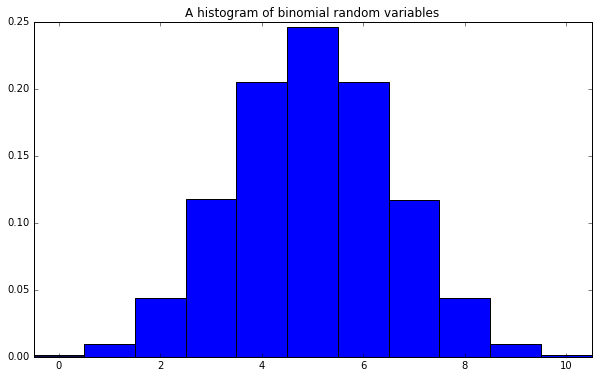

In [6]:
bins=sc.arange(12)-.5
plt.hist(bin_vars, bins=bins,normed=True)
plt.title("A histogram of binomial random variables")
plt.xlim([-.5,10.5])
plt.show()

Some facts about the binomial distribution: 
* The mean is $np$
* The variance is $np(1-p)$

**Mathematical aside**: Binomial (and Bernoulli) random variables are examples of *discrete random variables* since they can take only discrete values. A Bernoulli random variable can take values $0$ or $1$. A binomial random variable  can only take values 
$$
0,1,\ldots, n. 
$$
One can compute the probability that the variable takes each value. This is called the *probability mass function*. 
For a Bernoulli random variable, the probability mass function is given by 
$$
f(k) = \begin{cases} p & k=1 \\ 1-p & k = 0 \end{cases}
$$
For a binomial random variable, the probability mass function is given by 
$$
f(k) = \binom{n}{k} p^k (1-p)^{n-k}.
$$
Here, $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ is the number of ways to arrange the
$k$ heads among the $n$ flips. For a fair coin, we have $p=0.5$ and $f(k) = \binom{n}{k} \frac{1}{2^n}$. This is the number of ways to arrange $k$ heads among $n$ outcomes divided by the total number of outcomes. 

The probability mass function can be plotted using the scipy library as follows.

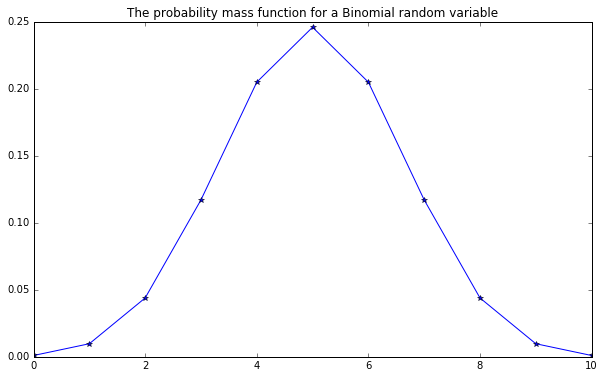

In [7]:
f = lambda k: binom.pmf(k, n=n,p=p)

x = sc.arange(n+1);
plt.plot(x, f(x),'*-')
plt.title("The probability mass function for a Binomial random variable")
plt.xlim([0,n])
plt.show()

Observe that the probability mass function looks very much like the histogram plot! (not a coincidence) 


**Concept check**: what is a random variable? 

A *random variable* is an abstraction of a coin. It can take on a set of possible different values, each with a preassigned probability. A Bernoulli r.v. takes value $1$ with probability $p$ and $0$ with probability $1-p$. A binomial r.v. takes values $0,1,\ldots,n$, with a given probability. The probabilities are given by the probability mass function. This function looks just like a histogram if you were to sample a large number of random variables. 

**Quiz**: what is the random variable that describes a fair dice? the sum of two fair dice? 

## Normal (Gaussian) distribution 

Roughly speaking, normal random variables are described by a "bell curve".  The curve is centered at the mean, $\mu$, and has width given by the standard deviation, $\sigma$. 

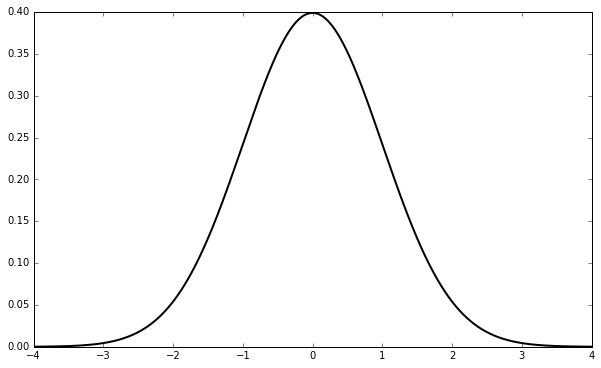

In [8]:
mu = 0 # mean
sigma = 1 # standard deviation 
x = sc.arange(mu-4*sigma,mu+4*sigma,0.001);
pdf = norm.pdf(x,loc=mu, scale=sigma)
# Here, I could have also written
# pdf = 1/(sigma * sc.sqrt(2 * sc.pi)) * sc.exp( - (x - mu)**2 / (2 * sigma**2)) 
plt.plot(x, pdf, linewidth=2, color='k')
plt.show()

A normal random variable is an example of a continuous random variable. A normal random variable can take any real value, but some numbers are more likely than others. More formally, we say that the probability density function (PDF) for the normal (Gaussian) distribution is
$$
f(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}
e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} },
$$
where $\mu$ is the mean and $\sigma$ is the variance. What this means is that the probability that a normal random variable will take values in the interval $[a,b]$ is given by 
$$
\int_a^b f(x) dx.
$$
This is just the area under the curve for this interval. For $a=\mu-\sigma$ and $b = \mu+\sigma$, we plot this below.

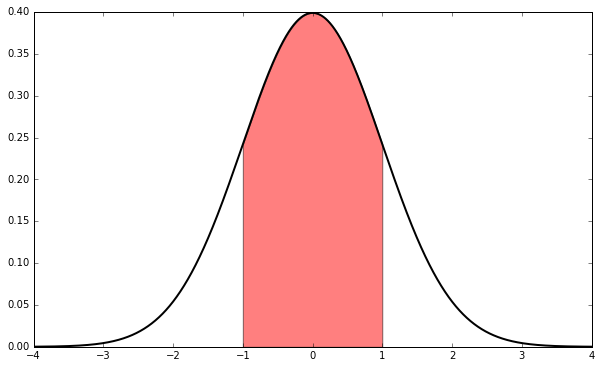

In [9]:
plt.plot(x, pdf, linewidth=2, color='k')
x2 = sc.arange(mu-sigma,mu+sigma,0.001)
plt.fill_between(x2, y1= norm.pdf(x2,loc=mu, scale=sigma), facecolor='red', alpha=0.5)
plt.show()

This integral can be computed using the *cumulative distribution function* (CDF)
$$
F(x) = \int_{-\infty}^x f(x) dx.
$$
We have that 
$$
\int_a^b f(x) dx = F(b) - F(a)
$$


In [10]:
norm.cdf(mu+sigma, loc=mu, scale=sigma) - norm.cdf(mu-sigma, loc=mu, scale=sigma) 

0.68268949213708585

This means that 68% of the time, this normal random variable will have values between $\mu-\sigma$ and $\mu+\sigma$. 

You used to have to look these values up in a table! 

Let's see what it looks like if we sample 1,000,000 normal random variables and then plot a histogram. 

[-0.77319702  1.2398549  -0.67800218 -0.07186515 -0.1986263   0.73181072
 -1.01630374  0.18271639 -0.14310177 -0.65327731  0.43995125  0.06314118
 -0.24719992 -0.01592647 -0.92021714  1.06722125 -0.23421402  0.6229967
 -0.83469007 -0.13844506 -0.61814829 -0.86658483 -0.43556925 -0.81747337
 -0.23093472  1.44472438  0.96911447 -2.20308158 -0.09401044 -1.11797486
 -1.39796233 -0.45372486  1.02360826 -0.35025713  0.30930321  0.0160014
 -0.01605741  0.30775808  0.87857742 -1.62590777 -0.58640803 -0.67125321
 -1.46691358 -1.10338451 -0.84477495 -0.68011054 -1.11427357 -1.8386875
 -0.93573482 -0.3840247   0.90084772  0.70462611 -0.45273529  1.03832542
 -0.7073831  -0.43909582  0.49179044  0.92245534 -0.14755676  1.59075508
 -2.65805237 -0.25716091  1.05894997 -1.08942572 -0.2426826   0.51267212
  2.15912705  0.09638395  1.923921   -0.33007429 -0.26391782  1.09622455
 -1.72216621 -2.43419427 -0.21037072  0.31910154  1.39207118 -0.09541166
 -0.15748426 -1.14487271 -0.26839306 -1.84040387  0.12

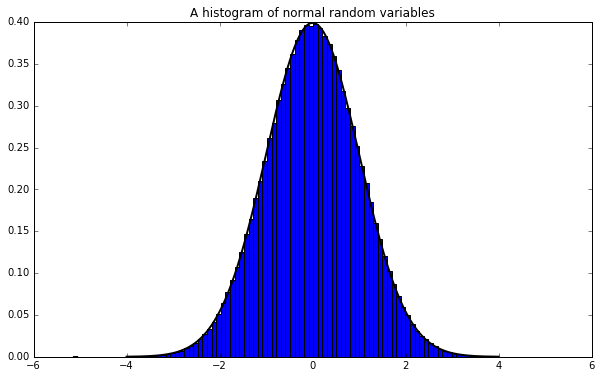

In [11]:
norm_vars = norm.rvs(loc=mu,scale=sigma,size=1000000)
print(norm_vars[:100])

plt.hist(norm_vars, bins=100,normed=True)
plt.plot(x, pdf, linewidth=2, color='k')
plt.title("A histogram of normal random variables")
plt.show()

The histogram of the sampled variables looks just like the probability distribution function!

#### Central Limit Theorem 

One of the reasons that the normal distribution is **so important** is the following theorem. 

**Central Limit Theorem.** Under "some assumptions", the sum of a "large number" $n$ of (independent) random variables, each with a finite mean $\mu$ and variance $\sigma^2$, will be approximately normally distributed with mean $n\mu$ and variance $n\sigma^2$.

How can we use the central limit theorem (CLT)? 

The CLT tells us that if $n$ is large, binomial random variables will be distributed in a certain way. That is, if we flip a coin many times, the number of heads that we're likely to see is described by a normal distribution. This will allow us to ask questions like: How unusual is it to flip a fair coin 1000 times and see 545 heads? 

Suppose we flip a fair ($p=0.5$) coin 1000 times. 

*Question:* How many heads do we expect to see? 

The CLT says that the number of heads (= sum of Bernoulli r.v. = binomial r.v.) is approximately normally distributed with mean 
$$ 
n\mu = np = 1000*0.5 = 500 
$$
and variance 
$$ 
n \sigma^2 = np(1-p) = 1000*0.5*0.5 = 250. 
$$
Let's do some experiments.

We call flipping a fair coin n=1,000 times and counting the number of heads a "simulation". Recall that the outcome is precisely a binomial random variable with n=1,000 and p = 0.5. We'll do 10,000 simulations and then compare the histogram of the binomial random variables and the normal distribution predicted by the CLT. 

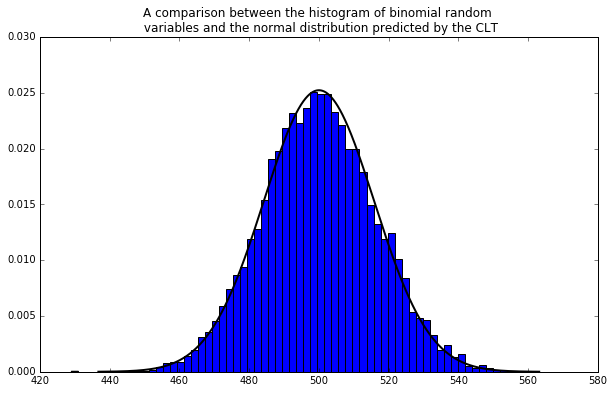

In [12]:
n = 1000
p = 0.5
bin_vars = binom.rvs(n=n,p=p,size=10000)

plt.hist(bin_vars, bins='auto',normed=True)

mu = n*p 
sigma = sc.sqrt(n*p*(1-p))
x = sc.arange(mu-4*sigma,mu+4*sigma,0.1);
pdf = norm.pdf(x, loc=mu, scale=sigma)
# Here, I could also write 
# pdf = 1/(sigma * sc.sqrt(2 * sc.pi)) * sc.exp( - (x - mu)**2 / (2 * sigma**2) ) 
plt.plot(x, pdf, linewidth=2, color='k')

plt.title("A comparison between the histogram of binomial random \n variables and the normal distribution predicted by the CLT")
plt.show()

## Hypothesis testing

So what is the likelihood of flipping a coin 1000 times and seeing less than 545 heads? 

The CLT tells us that this is approximately 
$$
\int_{-\infty}^{545} p(x) dx = F(545).
$$

This is something that we can easily evaluate using the cumulative distribution function (CDF). 

0.997786737071


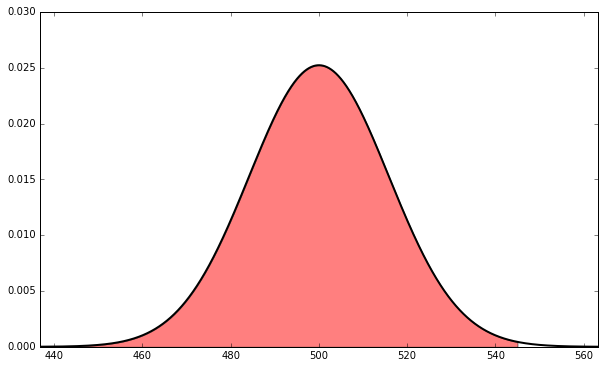

In [13]:
n = 1000
p = 0.5
mu = n*p
sigma = sc.sqrt(n*p*(1-p))
print(norm.cdf(545, loc=mu, scale=sigma))

# a plot illustrating the integral 
x = sc.arange(mu-4*sigma,mu+4*sigma,0.001);
plt.plot(x, norm.pdf(x, loc=mu, scale=sigma), linewidth=2, color='k')
x2 = sc.arange(mu-4*sigma,545,0.001)
plt.fill_between(x2, y1= norm.pdf(x2,loc=mu, scale=sigma), facecolor='red', alpha=0.5)
plt.xlim([mu-4*sigma,mu+4*sigma])
plt.show()

So $99.8\%$ of the time, we would see fewer than 545 heads.  So seeing 545 heads is **very** unlikely! It happens only $0.2\%$ of the time. This is so unlikely that we might declare that the coin is not fair! 

This is precisely what **hypothesis testing** is. 

In hypothesis testing, we make a null hypothesis, denoted $H_0$. In this case, the null hypothesis is
$$
H_0: \text{the coin is fair, i.e., $p=0.5$}.
$$
The alternative hypothesis, $H_a$, is typically the hypothesis that the researcher wants to validate. In this case, that the coin is unfair, i.e., $p\neq 0.5$. 
We also choose a significance level for the test, $\alpha$, traditionally $1\%$ or $5\%$. 
In this case, let's choose a significance level of $\alpha = 1\%$. We then perform an experiment. In this case, we flip the coin 1000 times and count the number of heads (in this case 545). 

Finally, assuming the null hypothesis is true, we compute how how likely it is to see a number that is at least as far from the expected value as the number obtained. To do this, we compute the integral 
$$
\int_{455}^{545} p(x) dx = F(545) - F(455)
$$
*Question*: why this lower bound?

In [14]:
val_integral = norm.cdf(545, loc=mu, scale=sigma) - norm.cdf(455, loc=mu, scale=sigma)
print(val_integral)
print(1-val_integral)

0.995573474142
0.00442652585792


Thus, $99.6\%$ of the time we see a value less extreme than 545. In other words, we would see either more than 545 heads or less than 455 heads only 0.4% of the time. The is called the *P-value*. Since the P-value is smaller than the chosen significance level, we reject the null hypothesis and declare the coin to be unfair.  

Some comments about the p-value:
1. A p-value is a probability calculated assuming that $H_0$ is true. 
+ The smaller the p-value, the stronger the evidence against $H_0$.
+ A p-value is not the probability that the null hypothesis is true of false. It is the probability that an erroneous conclusion is reached.  (More on this next lecture) 

## Example: "Freshman 15", Fact or Fiction

This example was taken from Devore, pp.314-315. 

"A common belief among the lay public is that body weight increases after entry into college, and the phrase 'freshman 15' has been coined to describe the 15 puunds that students presumably gain over their freshman year."

Let $\mu$ denote the true average weight gain in the first year of college. We take the null hypothesis to be
$$
H_0: \mu = 15
$$
We suppose a random sample of $n$ students is selected, their weights (before and after the first year of college) are measured, and the sample mean $\bar{x}$ and sample standard deviation $s$ are computed. An article in the journal Obesity (2006) cites that for a sample of $n=137$ students, the sample mean weight gain was $\bar{x}=2.42$ lb and with a sample standard deviation of $s=5.72$ lb. Assuming $H_0$ to be true, how unlikely is it that we would observe such a small value?  

We take a normal distribution with mean given by the null value ($\mu = 15$) and variance given by $s^2/n = (5.72)^2/137=0.2388$. 

In [15]:
mu = 15
sigma = sc.sqrt(5.72**2/137)
print(2*norm.cdf(2.42, loc=mu, scale=sigma))

3.9461271396e-146


Practically zero! We reject the null hypothesis and conclude that the 'freshman 15' is fiction! 

## Applications
- consumer preferences (A/B testing)
- regression
- quality control
- survey data